## Azure notebook Setup

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_specialty_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
inpatient_specialty_train_data= dataset.to_pandas_dataframe()

In [5]:
type(inpatient_specialty_train_data)

pandas.core.frame.DataFrame

In [6]:
inpatient_specialty_train_data.head()

,Column1,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
0,0,1,78.725684,2022-12-31 05:41:51,2023-01-01 23:06:29,DERMATOLOGY,Indiana
1,1,100001,86.568969,2012-07-21 23:00:00,2012-07-22 19:18:47,PM&R TRANSITIONAL REHAB,North Carolina
2,3,100015,56.646451,2002-07-16 06:40:13,2002-07-16 06:40:13,INTERMEDIATE MEDICINE,Massachusetts
3,4,100015,58.247495,2004-02-21 11:01:35,2004-02-22 14:56:40,DOMICILIARY PTSD,Rhode Island
4,5,100019,81.174959,1999-10-24 10:44:24,1999-10-31 10:20:31,PLASTIC SURGERY,Florida


----
# Inpatient_Specialty
----

### **Dataset Description:**

- **Internalpatientid:** This column represents the internal identifier for a patient. It is used to uniquely identify each patient in the dataset.

- **Age at specialty:** This column indicates the age of the patient at the start of their specialty care. It represents the patient's age in years.

- **Specialty start date:** This column specifies the date and time when the patient started receiving care in a specific medical specialty.

- **Specialty end date:** This column indicates the date and time when the patient's care in a particular medical specialty ended or was no longer recorded.

- **Specialty:** This column represents the specific medical specialty under which the patient received care or treatment. It could include specialties such as PULMONARY, NON-TB, SUBSTANCE ABUSE TRMT UNIT, SURGICAL OBSERVATION, GEM ACUTE MEDICINE, etc.

- **State:** This column indicates the state or location where the patient received the recorded specialty care. It represents the geographic location of the healthcare facility or provider.

---
## **Content:**
Reference: Explanation of Features
- 1. Importing Libraries
- 2. Data Exploration
- 3. Checking for Missing Values
- 4. Exploring Numerical Variables
- 5. Exploring Object-Type Features
- 6. Age-Based Bucketing for Specialty Aggregation and Grouping
     - Checking Missing Values for Grouped columns
- 7. Loading the Death file
     - Merging Specialty Grouped Columns and Death File with Left join on using Internalpatientid
     - Checking Missing Values for Death patients
- 8. Bivariate Analysis for Each Column vs. Death
- 9. Observations
---

**Reference: Explanation of Features**

**Specialty(128)**

- **GENERAL(ACUTE MEDICINE):** This label represents the specialty of general acute medicine. It typically involves the comprehensive care and management of patients with a wide range of acute medical conditions.

- **MEDICAL OBSERVATION:** This label refers to the specialty of medical observation. It involves the monitoring and assessment of patients' medical conditions over a short period to determine the appropriate course of treatment.

- **INTERMEDIATE MEDICINE:** This label indicates the specialty of intermediate medicine. It typically involves the care and management of patients who require a level of medical intervention between general medical care and intensive care.

- **TELEMETRY:** This label represents the specialty of telemetry. Telemetry involves the continuous monitoring of patients' vital signs, such as heart rate, blood pressure, and oxygen levels, usually in a dedicated unit or through remote monitoring systems.

- **MEDICAL ICU:** This label refers to the specialty of medical intensive care unit (ICU). It involves the specialized care and treatment of critically ill patients with complex medical conditions.

- **GENERAL SURGERY:** This label represents the specialty of general surgery. It involves surgical procedures and interventions for a wide range of medical conditions, excluding specialized surgical areas.

- **SUBST ABUSE CWT/TRANS RESID:** This label indicates the specialty of substance abuse treatment and residential transition programs. It involves the treatment and support for individuals with substance abuse or addiction issues.

- **HIGH INTENSITY GEN PSYCH INPAT:** This label refers to the specialty of high-intensity general psychiatric inpatient care. It involves the intensive treatment and care for patients with severe mental health conditions.

- **Not specified:** This label indicates that the specialty was not specified or mentioned in the dataset for those particular records.

- **NH SHORT-STAY CONTINUING CARE:** This label represents the specialty of short-stay continuing care in a nursing home setting. It involves the provision of specialized care and services for individuals who require temporary assistance or rehabilitation.

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import pandas as pd        # Library for data manipulation and analysis
import numpy as np         # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns       # Library for advanced data visualization

## 2. Data Exploration

In [8]:
# Changing variable name
df = inpatient_specialty_train_data

In [9]:
# Display the first few rows of a DataFrame
df.head()

,Column1,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
0,0,1,78.725684,2022-12-31 05:41:51,2023-01-01 23:06:29,DERMATOLOGY,Indiana
1,1,100001,86.568969,2012-07-21 23:00:00,2012-07-22 19:18:47,PM&R TRANSITIONAL REHAB,North Carolina
2,3,100015,56.646451,2002-07-16 06:40:13,2002-07-16 06:40:13,INTERMEDIATE MEDICINE,Massachusetts
3,4,100015,58.247495,2004-02-21 11:01:35,2004-02-22 14:56:40,DOMICILIARY PTSD,Rhode Island
4,5,100019,81.174959,1999-10-24 10:44:24,1999-10-31 10:20:31,PLASTIC SURGERY,Florida


In [10]:
# Shape of the dataset
df.shape

num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1452910
Number of columns: 7


In [11]:
# Get the number of unique values in the 'Internalpatientid' column
df['Internalpatientid'].nunique()

84543

In [12]:
# Dropping unnammed column
df = df.drop(df.columns[0], axis=1)

In [13]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452910 entries, 0 to 1452909
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Internalpatientid     1452910 non-null  int64         
 1   Age at specialty      1452910 non-null  float64       
 2   Specialty start date  1452910 non-null  datetime64[ns]
 3   Specialty end date    1452473 non-null  datetime64[ns]
 4   Specialty             1452910 non-null  object        
 5   State                 1452910 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 66.5+ MB


- The 'Internalpatientid' column contains integer values and the columns for 'Age at specialty' in float format, while the rest of the features are in object format.

## 3. Checking Missing Values

In [14]:
# List comprehension to find columns with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Specialty end date']

In [15]:
# Count the number of missing values in each column
df.isnull().sum()

Internalpatientid         0
Age at specialty          0
Specialty start date      0
Specialty end date      437
Specialty                 0
State                     0
dtype: int64

- The Dataset has some missing values in ‘Specialty end date’ has few missing values.

## 4. Exploring Numerical Variables

### Age at specialty

In [16]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Internalpatientid,Age at specialty
count,1.452910e+06,1.452910e+06
mean,8.482674e+04,6.947698e+01
std,4.893081e+04,1.175978e+01
min,1.000000e+00,2.039913e+01
25%,4.229650e+04,6.126726e+01
50%,8.539200e+04,6.939885e+01
75%,1.271790e+05,7.800050e+01
max,1.690640e+05,1.092267e+02


In [17]:
# Calculate descriptive statistics for the dataframe
description = df.describe()
min_age = description.loc['min', 'Age at specialty']  # Extract the minimum age value
max_age = description.loc['max', 'Age at specialty']  # Extract the maximum age value
mean = description.loc['mean', 'Age at specialty']  # Extract the mean age value
count = description.loc['count', 'Age at specialty']  # Extract the count of age values

print("Age at specialty:") 
print("Mean age: {:.2f}".format(mean))  # Print the mean age formatted with two decimal places
print("Minimum Age: {:.2f}".format(min_age))  # Print the minimum age formatted with two decimal places
print("Maximum Age: {:.2f}".format(max_age))  # Print the maximum age formatted with two decimal places
print("Count:", count)

Age at specialty:
Mean age: 69.48
Minimum Age: 20.40
Maximum Age: 109.23
Count: 1452910.0


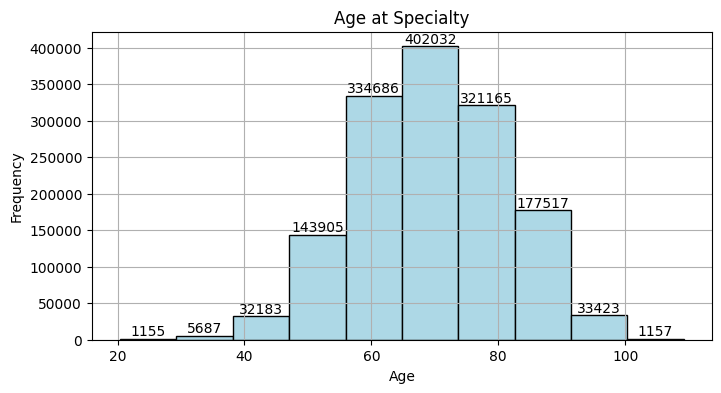

In [18]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at specialty']

# Create a histogram
plt.figure(figsize=(8, 4))
hist = plt.hist(age, bins=10, edgecolor='black', color='lightblue')  # Adjust the number of bins as needed

# Add x-bar values to each bar with adjusted spacing
for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i+1] - hist[1][i])/2, hist[0][i] + 10, str(int(hist[0][i])), ha='center', va='bottom', color='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at Specialty')
plt.grid(True)  # Add grid lines
plt.show()

- The mean age at specialty is approximately 69 years old, which suggests that the majority of patients are elderly. 
- The standard deviation of the age column is approximately 11 years, indicating that there is a significant variation in age among the patients. 
- The minimum age at location is 20 years old, while the maximum is 109 years old, highlighting the wide range of ages represented in the dataset. 
- The quartile values also show that 50% of the patients locatted were between 61 and 78 years old.

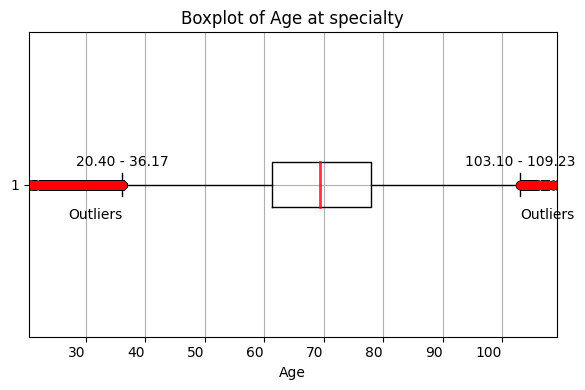

In [19]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at specialty']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at specialty')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(age):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(age):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Outlier Ages:** There are two ranges of outlier ages in the dataset. One range is between 20 and 36, and the other range is between 103 and 109.

---

## 5. Explore Object type features

In [20]:
df.describe(include=['object'])

,Specialty,State
count,1452910,1452910
unique,128,51
top,GENERAL(ACUTE MEDICINE),California
freq,249193,118213


The dataset has specialty start date and Specialty end date	here we can calculate how many days they took the treatment. might be helpful for the future purpose.

### **Specialty** (128)

In [21]:
df_specialty = df['Specialty'].value_counts().to_frame()

In [95]:
df_specialty = df['Specialty'].value_counts()

In [96]:
df_specialty

GENERAL(ACUTE MEDICINE)         249193
MEDICAL OBSERVATION              62382
TELEMETRY                        32403
GENERAL SURGERY                  30772
INTERMEDIATE MEDICINE            30762
                                 ...  
zGENERAL(ACUTE MEDICINE             15
ZZSUBST ABUSE STAR I,II,II           6
DOMICILIARY GENERAL                  4
DOMICILIARY SUBSTANCE USE DO         4
ZZ POLYTRAUMA REHAB UNIT             1
Name: Specialty, Length: 128, dtype: int64

In [22]:
df_specialty = df_specialty.reset_index()

In [23]:
df_specialty.columns = ['Specialty', 'counts for specialty']

In [24]:
# Set display option to print all rows
pd.set_option('display.max_rows', None)

# Print all rows of the DataFrame
print(df_specialty)

# Reset display option to default
pd.reset_option('display.max_rows')

                          Specialty  counts for specialty
0           GENERAL(ACUTE MEDICINE)                249193
1               MEDICAL OBSERVATION                 62382
2                         TELEMETRY                 32403
3                   GENERAL SURGERY                 30772
4             INTERMEDIATE MEDICINE                 30762
5                       MEDICAL ICU                 29265
6    HIGH INTENSITY GEN PSYCH INPAT                 27103
7                        CARDIOLOGY                 26843
8              SURGICAL OBSERVATION                 22320
9     NH SHORT-STAY CONTINUING CARE                 20372
10          BLIND REHAB OBSERVATION                 19835
11               SPINAL CORD INJURY                 19688
12                       ORTHOPEDIC                 18228
13          PULMONARY, TUBERCULOSIS                 17613
14                    Not specified                 16886
15                      DOMICILIARY                 16588
16            

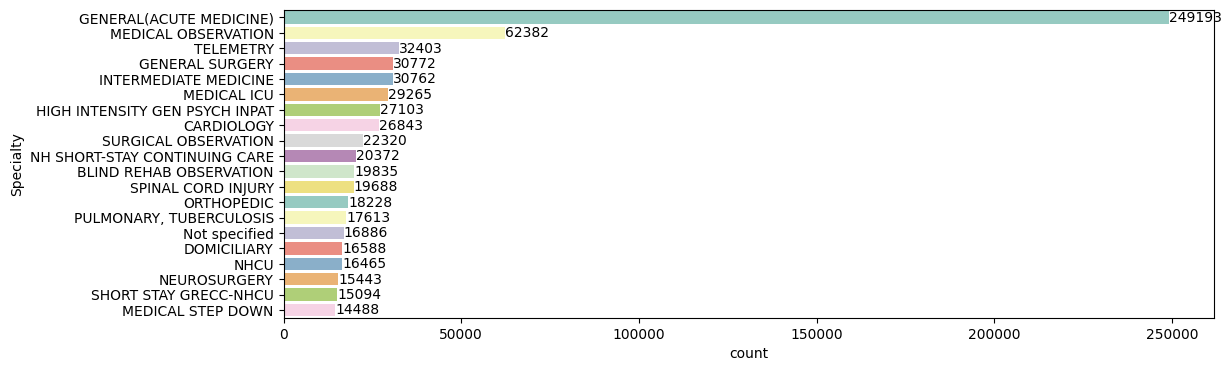

In [25]:
# Generate a frequency table of the categorical variable
freq_table = df['Specialty'].value_counts()

plt.figure(figsize=(12, 4))  # Adjust the width and height as needed

# Define a custom color palette with different colors for each category
custom_palette = sns.color_palette("Set3", n_colors=len(freq_table))

# Plot the frequency table using Seaborn's countplot function with the custom color palette
ax = sns.countplot(y='Specialty', data=df, order=freq_table.index[:20], palette=custom_palette)

# Add count labels to the bars
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- There are 128 unique specialties in the dataset, indicating that the hospital admits patients with a wide range of medical conditions and needs.
- The most common specialty was GENERAL(ACUTE MEDICINE) (249193 occurrences).

### State

- The majority of patients were from California, with a total of 118213 patients. The dataset also includes a breakdown of patients by state.

---

### Compare Inpatient Admission and Inpatient Specialty dataset’s ‘Specialty’ related column:

### Observations:

**Example 1:** Internalpatientid = 67
- **Dataset 1:** Inpatient Admission
    - Age at admission - 56.99798773
    - Admitting specialty - ALLERGY
    - Discharging specialty - MEDICAL OBSERVATION
- **Dataset 2:** Inpatient Specialty
    - Age at location - 56.99798773
    - Specialty - MEDICAL OBSERVATION ALLERGY
    
**Example 2:** Internalpatientid = 122432
- **Dataset 1:** Inpatient Admission
    - Age at admission - 70.87471934 - 73.33307126
    - Admitting Specialty - Domiciliary Substance Abuse, Proctology, Surgical ICU, Nh Short Stay Dementia Care, Halfway House
    - Discharging Specialty- General (Acute Medicine), Nh Long-Stay Continuing Care, Not Specified (No Value), Medical ICU, Rehabilitation Medicine
- **Dataset 2:** Inpatient Specialty
    - Age at Specialty - 61.12161138 - 73.93383658
    - Specialty - Domiciliary Substance Abuse, Proctology, Surgical ICU, Nh Short Stay Dementia Care, Halfway House, General (Acute Medicine), Nh Long-Stay Continuing Care, Not Specified (No Value), Medical ICU, Rehabilitation Medicine, Gem Domiciliary. 


In the Inpatient Admission dataset, there is a "Not Specified" (No Value) specialty at the age of 66.3715007. In the Inpatient Specialty dataset, there is a "Gem Domiciliary" specialty at the age of 66.48875551.


Like this, I have checked more than 15 unique patient records. So, both the Inpatient Admission and Inpatient Specialty dataset has the 95% same values in the Specialty column for the patients.

---

## Age-Based Bucketing for Service Aggregation and Grouping

In [27]:
# Drop the specified columns from the DataFrame
df.drop(['Specialty start date','Specialty end date','State'], axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452910 entries, 0 to 1452909
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Internalpatientid  1452910 non-null  int64  
 1   Age at specialty   1452910 non-null  float64
 2   Specialty          1452910 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [29]:
# changing variable name for dataframe
inpatient_specialty = df

In [30]:
inpatient_specialty.describe()

,Internalpatientid,Age at specialty
count,1.452910e+06,1.452910e+06
mean,8.482674e+04,6.947698e+01
std,4.893081e+04,1.175978e+01
min,1.000000e+00,2.039913e+01
25%,4.229650e+04,6.126726e+01
50%,8.539200e+04,6.939885e+01
75%,1.271790e+05,7.800050e+01
max,1.690640e+05,1.092267e+02


In [31]:
# Define the age ranges
age_ranges = [(20, 29.9), (30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9), (70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)]

# Iterate over each age range
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_specialty'
    inpatient_specialty[range_label] = inpatient_specialty.apply(
        lambda row: row['Specialty'] if range_start <= row['Age at specialty'] <= range_end else None,
        axis=1
    )
    # Remove duplicate specialty within each age range
    inpatient_specialty[range_label] = inpatient_specialty[range_label].apply(
        lambda x: ','.join(set(x.split(','))) if isinstance(x, str) else None
    )

# Group the DataFrame by 'Internalpatientid' and concatenate the unique specialty
df_grouped = inpatient_specialty.groupby('Internalpatientid').agg(
    lambda x: ','.join(set(','.join(x.dropna()).split(','))) if len(x.dropna()) > 0 else None
)

# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()
df_grouped

,Internalpatientid,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty
0,1,"SPINAL CORD INJURY,DERMATOLOGY,GENERAL(ACUTE M...",None,None,None,None,"PERIPHERAL VASCULAR,PODIATRY,GENERAL(ACUTE MED...","GENERAL(ACUTE MEDICINE),SPINAL CORD INJURY,URO...",None,None,None
1,2,"GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,"SURGICAL OBSERVATION,ED OBSERVATION,MEDICAL OB...","GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,None
2,3,"NHCU,GENERAL(ACUTE MEDICINE),PSYCH RESID REHAB...",None,None,None,None,None,"GENERAL(ACUTE MEDICINE),NH LONG STAY DEMENTIA ...","NHCU,PSYCH RESID REHAB TRMT PROG",None,None
3,4,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,None,None,None,None,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None
4,5,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None,None,None,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
84538,169055,"PTSD RESIDENTIAL REHAB PROG,PSYCH RESID REHAB ...",None,None,None,"PTSD RESIDENTIAL REHAB PROG,PSYCH RESID REHAB ...",None,None,None,None,None
84539,169057,"SURGICAL STEPDOWN,ALLERGY, THROAT (ENT),LONG S...",None,None,None,None,None,"TELEMETRY,ALLERGY,GEM INTERMEDIATE CARE,NH LON...","SURGICAL STEPDOWN, THROAT (ENT),LONG STAY GREC...",None,None
84540,169060,"SUBST ABUSE CWT/TRANS RESID,PULMONARY,ALCOHOL ...",None,None,None,"PULMONARY,DOD BEDS IN VA FACILITY, TUBERCULOSI...","MEDICAL ICU,NEUROLOGY,GENERAL(ACUTE MEDICINE)","ALCOHOL DEPENDENCE TRMT UNIT,ALLERGY,ED OBSERV...",None,None,None
84541,169062,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",None,None,None,None,None,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",None,None,None


In [32]:
# shape for grouped data
df_grouped.shape 

num_rows = df_grouped.shape[0]  # Number of rows
num_cols = df_grouped.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 84543
Number of columns: 11


In [33]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
df_grouped.Internalpatientid.nunique()

Unique df_grouped Internalpatientid


84543

In [34]:
# Checking bucketing row values of 'Internalpatientid']==169057
df_grouped[df_grouped['Internalpatientid']==169057]

,Internalpatientid,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty
84539,169057,"SURGICAL STEPDOWN,ALLERGY, THROAT (ENT),LONG S...",None,None,None,None,None,"TELEMETRY,ALLERGY,GEM INTERMEDIATE CARE,NH LON...","SURGICAL STEPDOWN, THROAT (ENT),LONG STAY GREC...",None,None


In [35]:
# # Checking all row values of 'Internalpatientid']==169057
inpatient_specialty[inpatient_specialty['Internalpatientid']==169057]

,Internalpatientid,Age at specialty,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty
508196,169057,74.601782,ALLERGY,None,None,None,None,None,ALLERGY,None,None,None
508197,169057,84.944971,GEM INTERMEDIATE CARE,None,None,None,None,None,None,GEM INTERMEDIATE CARE,None,None
508198,169057,85.790693,NH SHORT STAY REHABILITATION,None,None,None,None,None,None,NH SHORT STAY REHABILITATION,None,None
508199,169057,85.810265,NH SHORT STAY REHABILITATION,None,None,None,None,None,None,NH SHORT STAY REHABILITATION,None,None
512948,169057,73.478655,MEDICAL OBSERVATION,None,None,None,None,None,MEDICAL OBSERVATION,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1281183,169057,85.102486,SURGICAL OBSERVATION,None,None,None,None,None,None,SURGICAL OBSERVATION,None,None
1281184,169057,85.109985,GENERAL(ACUTE MEDICINE),None,None,None,None,None,None,GENERAL(ACUTE MEDICINE),None,None
1281185,169057,85.300115,NH SHORT STAY REHABILITATION,None,None,None,None,None,None,NH SHORT STAY REHABILITATION,None,None
1281186,169057,85.307491,CARDIOLOGY,None,None,None,None,None,None,CARDIOLOGY,None,None


In [36]:
# Checking row values if it is correctly printed like A, B, C...
column_value = df_grouped['60.0-69.9_specialty'].values[0]
print(column_value)

PERIPHERAL VASCULAR,PODIATRY,GENERAL(ACUTE MEDICINE)


### Checking Missing Values for Grouped columns

In [37]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = df_grouped.isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = df_grouped.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame summarizing the missing values per column
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

# Print the missing values summary per column
print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Specialty,0,0.000000
20-29.9_specialty,84386,99.814296
30.0-39.9_specialty,83569,98.847924
40.0-49.9_specialty,78734,93.128940
50.0-59.9_specialty,63498,75.107342
60.0-69.9_specialty,48489,57.354246
70.0-79.9_specialty,48739,57.649953
80.0-89.9_specialty,62530,73.962362
90.0-99.9_specialty,79273,93.766486


## Exploring the Death file

In [39]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [40]:
df_death = dataset.to_pandas_dataframe()

In [41]:
df_death.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [42]:
# Shape of the dataset
df_death.shape
num_rows = df_death.shape[0]  # Number of rows
num_cols = df_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 97284
Number of columns: 4


In [43]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
df_death['death'] = 1
df_death.head()

,Column1,Internalpatientid,Age at death,Death date,death
0,0,100036,72.412770,2015-01-18 20:49:10,1
1,1,100037,75.241135,2008-10-16 15:14:26,1
2,2,100045,85.399403,2019-01-26 11:33:52,1
3,3,100095,84.136551,2004-08-10 21:49:35,1
4,6,10013,68.372126,2007-06-11 00:17:06,1


In [44]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Column1            97284 non-null  int64         
 1   Internalpatientid  97284 non-null  int64         
 2   Age at death       97284 non-null  float64       
 3   Death date         97284 non-null  datetime64[ns]
 4   death              97284 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.7 MB


In [47]:
# Dropping the specified columns from df_death dataframe
df_death = df_death.drop(['Column1', 'Age at death', 'Death date'],axis=1)

In [48]:
df_death.head()

,Internalpatientid,death
0,100036,1
1,100037,1
2,100045,1
3,100095,1
4,10013,1


In [49]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Internalpatientid  97284 non-null  int64
 1   death              97284 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


### Merging Inpatient specialty Grouped Columns and death file with Left join on using Internalpatientid

In [50]:
# merging Inpatient specialty grouped columns and death file with Left join on using Internalpatientid
inpatient_specialty_death = pd.merge(df_grouped, df_death, how='left',on='Internalpatientid')

In [51]:
# Shape of the merged dataset
inpatient_specialty_death.shape # it will have both death and alive for inpatients data
num_rows = inpatient_specialty_death.shape[0]  # Number of rows
num_cols = inpatient_specialty_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 84543
Number of columns: 12


In [52]:
inpatient_specialty_death.head()

,Internalpatientid,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty,death
0,1,"SPINAL CORD INJURY,DERMATOLOGY,GENERAL(ACUTE M...",None,None,None,None,"PERIPHERAL VASCULAR,PODIATRY,GENERAL(ACUTE MED...","GENERAL(ACUTE MEDICINE),SPINAL CORD INJURY,URO...",None,None,None,NaN
1,2,"GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,"SURGICAL OBSERVATION,ED OBSERVATION,MEDICAL OB...","GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,None,NaN
2,3,"NHCU,GENERAL(ACUTE MEDICINE),PSYCH RESID REHAB...",None,None,None,None,None,"GENERAL(ACUTE MEDICINE),NH LONG STAY DEMENTIA ...","NHCU,PSYCH RESID REHAB TRMT PROG",None,None,1.0
3,4,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,None,None,None,None,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,1.0
4,5,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None,None,None,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None,1.0


### Alive_patients

In [53]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
inpatient_specialty_death['death'] = inpatient_specialty_death['death'].fillna(0).astype(int)

In [54]:
df_alive = inpatient_specialty_death[inpatient_specialty_death['death']==0]
df_alive

,Internalpatientid,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty,death
0,1,"SPINAL CORD INJURY,DERMATOLOGY,GENERAL(ACUTE M...",None,None,None,None,"PERIPHERAL VASCULAR,PODIATRY,GENERAL(ACUTE MED...","GENERAL(ACUTE MEDICINE),SPINAL CORD INJURY,URO...",None,None,None,0
1,2,"GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,"SURGICAL OBSERVATION,ED OBSERVATION,MEDICAL OB...","GEN INTERMEDIATE PSYCH,MEDICAL ICU,DERMATOLOGY...",None,None,None,None,0
5,8,"HALFWAY HOUSE,GENERAL(ACUTE MEDICINE)",None,None,None,None,"HALFWAY HOUSE,GENERAL(ACUTE MEDICINE)",None,None,None,None,0
7,11,"SURGICAL STEPDOWN,SPINAL CORD INJURY OBSERVATI...",None,None,None,"SPINAL CORD INJURY OBSERVATION,NH SHORT STAY S...","SURGICAL STEPDOWN,SPINAL CORD INJURY OBSERVATI...","METABOLIC,GENERAL(ACUTE MEDICINE)",None,None,None,0
8,13,"CARDIOLOGY,GENERAL(ACUTE MEDICINE)",None,None,None,None,None,"CARDIOLOGY,GENERAL(ACUTE MEDICINE)",None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...
84520,169014,"SPINAL CORD INJURY OBSERVATION,TELEMETRY,SPINA...",None,None,None,"TELEMETRY,SPINAL CORD INJURY,PSYCH RESID REHAB...","SPINAL CORD INJURY OBSERVATION,TELEMETRY,SPINA...",None,None,None,None,0
84521,169016,"GEM REHABILITATION MEDICINE,GENERAL(ACUTE MEDI...",None,None,"GEM REHABILITATION MEDICINE,RESPITE CARE (MEDI...","GEM REHABILITATION MEDICINE,PM&R TRANSITIONAL ...",None,None,None,None,None,0
84532,169041,"NEUROSURGERY,GENERAL SURGERY,SURGICAL ICU,GENE...",None,None,"GENERAL SURGERY,GENERAL(ACUTE MEDICINE),DOMICI...","Not specified,NEUROSURGERY,SURGICAL ICU,GENERA...",None,None,None,None,None,0
84534,169047,"PULMONARY,ED OBSERVATION,GENERAL(ACUTE MEDICIN...",None,None,None,"ED OBSERVATION,GENERAL(ACUTE MEDICINE),ORTHOPE...","PULMONARY,GENERAL(ACUTE MEDICINE),ORTHOPEDIC, ...",None,None,None,None,0


In [55]:
 # Shape of the merged dataset
df_alive.shape   # it will have only alive patients
num_rows = df_alive.shape[0]  # Number of rows
num_cols = df_alive.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 23528
Number of columns: 12


In [56]:
df_alive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23528 entries, 0 to 84539
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Internalpatientid      23528 non-null  int64 
 1   Specialty              23528 non-null  object
 2   20-29.9_specialty      127 non-null    object
 3   30.0-39.9_specialty    668 non-null    object
 4   40.0-49.9_specialty    3077 non-null   object
 5   50.0-59.9_specialty    8726 non-null   object
 6   60.0-69.9_specialty    13144 non-null  object
 7   70.0-79.9_specialty    9270 non-null   object
 8   80.0-89.9_specialty    2742 non-null   object
 9   90.0-99.9_specialty    557 non-null    object
 10  100.0-109.9_specialty  19 non-null     object
 11  death                  23528 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


### Death_patients

In [57]:
# Extracting death patients from the dataset
death_patients = inpatient_specialty_death[inpatient_specialty_death['death']==1]
death_patients

,Internalpatientid,Specialty,20-29.9_specialty,30.0-39.9_specialty,40.0-49.9_specialty,50.0-59.9_specialty,60.0-69.9_specialty,70.0-79.9_specialty,80.0-89.9_specialty,90.0-99.9_specialty,100.0-109.9_specialty,death
2,3,"NHCU,GENERAL(ACUTE MEDICINE),PSYCH RESID REHAB...",None,None,None,None,None,"GENERAL(ACUTE MEDICINE),NH LONG STAY DEMENTIA ...","NHCU,PSYCH RESID REHAB TRMT PROG",None,None,1
3,4,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,None,None,None,None,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,1
4,5,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None,None,None,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,None,None,1
6,10,"DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION",None,None,None,None,"DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION",None,None,None,None,1
9,15,"EAR, THROAT (ENT),GENERAL(ACUTE MEDICINE), NOS...",None,None,None,None,"GENERAL SURGERY,BLIND REHAB",None,"EAR, THROAT (ENT),GENERAL(ACUTE MEDICINE), NOS...",None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84537,169053,"SURGICAL STEPDOWN,SPINAL CORD INJURY OBSERVATI...",None,None,None,None,None,"SPINAL CORD INJURY OBSERVATION,TELEMETRY,MEDIC...","SURGICAL STEPDOWN,TELEMETRY,NH LONG-STAY MH RE...",None,None,1
84538,169055,"PTSD RESIDENTIAL REHAB PROG,PSYCH RESID REHAB ...",None,None,None,"PTSD RESIDENTIAL REHAB PROG,PSYCH RESID REHAB ...",None,None,None,None,None,1
84540,169060,"SUBST ABUSE CWT/TRANS RESID,PULMONARY,ALCOHOL ...",None,None,None,"PULMONARY,DOD BEDS IN VA FACILITY, TUBERCULOSI...","MEDICAL ICU,NEUROLOGY,GENERAL(ACUTE MEDICINE)","ALCOHOL DEPENDENCE TRMT UNIT,ALLERGY,ED OBSERV...",None,None,None,1
84541,169062,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",None,None,None,None,None,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",None,None,None,1


In [58]:
# Shape of the merged dataset
death_patients.shape   # it will have only death patients
num_rows = death_patients.shape[0]  # Number of rows
num_cols = death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 61015
Number of columns: 12


In [59]:
death_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61015 entries, 2 to 84542
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Internalpatientid      61015 non-null  int64 
 1   Specialty              61015 non-null  object
 2   20-29.9_specialty      30 non-null     object
 3   30.0-39.9_specialty    306 non-null    object
 4   40.0-49.9_specialty    2732 non-null   object
 5   50.0-59.9_specialty    12319 non-null  object
 6   60.0-69.9_specialty    22910 non-null  object
 7   70.0-79.9_specialty    26534 non-null  object
 8   80.0-89.9_specialty    19271 non-null  object
 9   90.0-99.9_specialty    4713 non-null   object
 10  100.0-109.9_specialty  144 non-null    object
 11  death                  61015 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 6.1+ MB


### Checking Missing Values for Death_patients

In [60]:
# Replace blank values with NaN
death_patients.replace('', np.nan, inplace=True)

missing_values_count = death_patients.isnull().sum()
total_rows = death_patients.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Specialty,0,0.000000
20-29.9_specialty,60985,99.950832
30.0-39.9_specialty,60709,99.498484
40.0-49.9_specialty,58283,95.522413
50.0-59.9_specialty,48696,79.809883
60.0-69.9_specialty,38105,62.451856
70.0-79.9_specialty,34481,56.512333
80.0-89.9_specialty,41744,68.415963
90.0-99.9_specialty,56302,92.275670


### Counting for death and alive patients

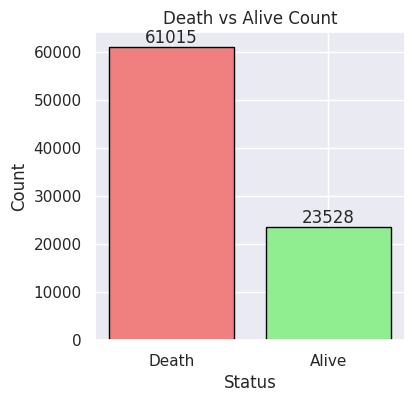

In [61]:
count = inpatient_specialty_death['death']

# Count the occurrences of each category
value_counts = count.value_counts()

# Create a bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(['Death', 'Alive'], [value_counts[1], value_counts[0]], edgecolor='black', color=['lightcoral', 'lightgreen'])

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Death vs Alive Count')
plt.grid(True)  # Add grid lines
plt.show()

### Comparing missing value percentage with 'death_patients' and 'df_grouped'

In [62]:
# Calculate missing values count and percentage for df_grouped
grouped_missing_values_count = inpatient_specialty_death.isnull().sum()
grouped_missing_percentage = (grouped_missing_values_count / inpatient_specialty_death.shape[0]) * 100


# Calculate missing values count and percentage for death_patients
death_missing_values_count = death_patients.isnull().sum()
death_missing_percentage = (death_missing_values_count / death_patients.shape[0]) * 100

# Calculate the difference in missing values percentage between grouped data and death patients
missing_percentage_difference = grouped_missing_percentage - death_missing_percentage

# Format the 'Missing Values Count (Grouped Data)' column values with leading zeros
grouped_missing_values_count_formatted = grouped_missing_values_count.map('{:04d}'.format)

# Create a DataFrame for the missing values summary
missing_data_summary = pd.DataFrame({
    'Missing Values Count (Grouped Data)': grouped_missing_values_count_formatted,
    'Missing Values Percentage (Grouped Data)': grouped_missing_percentage.map('{:.2f}%'.format),
    'Missing Values Count (Death Patients)': death_missing_values_count,
    'Missing Values Percentage (Death Patients)': death_missing_percentage.map('{:.2f}%'.format),
    'Difference in Missing Values Percentage': missing_percentage_difference.map('{:.2f}%'.format)
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count (Grouped Data),Missing Values Percentage (Grouped Data),Missing Values Count (Death Patients),Missing Values Percentage (Death Patients),Difference in Missing Values Percentage
Internalpatientid,0000,0.00%,0,0.00%,0.00%
Specialty,0000,0.00%,0,0.00%,0.00%
20-29.9_specialty,84386,99.81%,60985,99.95%,-0.14%
30.0-39.9_specialty,83569,98.85%,60709,99.50%,-0.65%
40.0-49.9_specialty,78734,93.13%,58283,95.52%,-2.39%
50.0-59.9_specialty,63498,75.11%,48696,79.81%,-4.70%
60.0-69.9_specialty,48489,57.35%,38105,62.45%,-5.10%
70.0-79.9_specialty,48739,57.65%,34481,56.51%,1.14%
80.0-89.9_specialty,62530,73.96%,41744,68.42%,5.55%
90.0-99.9_specialty,79273,93.77%,56302,92.28%,1.49%


In [63]:
# dropping columns that have a large number of missing values.
columns_to_drop = ['100.0-109.9_specialty', '90.0-99.9_specialty', '20-29.9_specialty', '30.0-39.9_specialty', '80.0-89.9_specialty', 
                   '40.0-49.9_specialty', '50.0-59.9_specialty']

df_death_patients = death_patients.drop(columns=columns_to_drop)

In [64]:
df_death_patients

,Internalpatientid,Specialty,60.0-69.9_specialty,70.0-79.9_specialty,death
2,3,"NHCU,GENERAL(ACUTE MEDICINE),PSYCH RESID REHAB...",None,"GENERAL(ACUTE MEDICINE),NH LONG STAY DEMENTIA ...",1
3,4,"II & III,TRANSPLANTATION,STAR I,GENERAL(ACUTE...",None,None,1
4,5,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",None,"MEDICAL ICU,NH SHORT STAY RESTORATIVE,SURGICAL...",1
6,10,"DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION","DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION",None,1
9,15,"EAR, THROAT (ENT),GENERAL(ACUTE MEDICINE), NOS...","GENERAL SURGERY,BLIND REHAB",None,1
...,...,...,...,...,...
84537,169053,"SURGICAL STEPDOWN,SPINAL CORD INJURY OBSERVATI...",None,"SPINAL CORD INJURY OBSERVATION,TELEMETRY,MEDIC...",1
84538,169055,"PTSD RESIDENTIAL REHAB PROG,PSYCH RESID REHAB ...",None,None,1
84540,169060,"SUBST ABUSE CWT/TRANS RESID,PULMONARY,ALCOHOL ...","MEDICAL ICU,NEUROLOGY,GENERAL(ACUTE MEDICINE)","ALCOHOL DEPENDENCE TRMT UNIT,ALLERGY,ED OBSERV...",1
84541,169062,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",None,"SURGICAL STEPDOWN,PULMONARY,NEUROSURGERY, TUBE...",1


In [65]:
df_death_patients.describe(include =['object'])

,Specialty,60.0-69.9_specialty,70.0-79.9_specialty
count,61015,22910,26534
unique,43820,16349,17688
top,"INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE)","INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE)","INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE)"
freq,254,107,160


## Bivariate analysis for each column vs death

### 60.0-69.9_specialty

In [66]:
# Generating descriptive statistics for object columns in df_death_patients dataframe
df_death_patients['60.0-69.9_specialty'].value_counts().head(20)

INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE)             107
NEUROSURGERY,GENERAL(ACUTE MEDICINE)                      106
BLIND REHAB OBSERVATION,GENERAL(ACUTE MEDICINE)            95
PULMONARY, TUBERCULOSIS,GENERAL(ACUTE MEDICINE)            94
SPINAL CORD INJURY OBSERVATION,GENERAL(ACUTE MEDICINE)     78
PSYCH RESID REHAB TRMT PROG,GENERAL(ACUTE MEDICINE)        73
SPINAL CORD INJURY,GENERAL(ACUTE MEDICINE)                 71
SURGICAL OBSERVATION,GENERAL(ACUTE MEDICINE)               67
NH SHORT-STAY CONTINUING CARE,GENERAL(ACUTE MEDICINE)      66
PERIPHERAL VASCULAR,GENERAL(ACUTE MEDICINE)                63
TELEMETRY,GENERAL(ACUTE MEDICINE)                          61
CARDIAC INTENSIVE CARE UNIT,GENERAL(ACUTE MEDICINE)        60
NH SHORT-STAY MH RECOVERY,GENERAL(ACUTE MEDICINE)          56
GENERAL(ACUTE MEDICINE)                                    54
ORTHOPEDIC,GENERAL(ACUTE MEDICINE)                         54
DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE)                   51
GRECC-GE

### 70.0-79.9_specialty

In [67]:
df_death_patients['70.0-79.9_specialty'].value_counts().head(20)

INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE)             160
SPINAL CORD INJURY,GENERAL(ACUTE MEDICINE)                137
BLIND REHAB OBSERVATION,GENERAL(ACUTE MEDICINE)           129
PULMONARY, TUBERCULOSIS,GENERAL(ACUTE MEDICINE)           116
PSYCH RESID REHAB TRMT PROG,GENERAL(ACUTE MEDICINE)       113
NEUROSURGERY,GENERAL(ACUTE MEDICINE)                      112
SPINAL CORD INJURY OBSERVATION,GENERAL(ACUTE MEDICINE)     98
GENERAL(ACUTE MEDICINE)                                    94
ORTHOPEDIC,GENERAL(ACUTE MEDICINE)                         93
TELEMETRY,GENERAL(ACUTE MEDICINE)                          89
TRANSPLANTATION,GENERAL(ACUTE MEDICINE)                    88
SURGICAL OBSERVATION,GENERAL(ACUTE MEDICINE)               87
NH SHORT-STAY CONTINUING CARE,GENERAL(ACUTE MEDICINE)      84
DOD BEDS IN VA FACILITY,GENERAL(ACUTE MEDICINE)            83
DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE)                   80
NEUROLOGY,GENERAL(ACUTE MEDICINE)                          73
PERIPHER

**INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE):** The most common specialty recorded in the death reason is INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE).

### Bivariate analysis for whole data service column vs death

In [68]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_specialty_train.csv')])

In [73]:
df_specialty = dataset.to_pandas_dataframe()

In [75]:
df_specialty

,Column1,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
0,0,1,78.725684,2022-12-31 05:41:51,2023-01-01 23:06:29,DERMATOLOGY,Indiana
1,1,100001,86.568969,2012-07-21 23:00:00,2012-07-22 19:18:47,PM&R TRANSITIONAL REHAB,North Carolina
2,3,100015,56.646451,2002-07-16 06:40:13,2002-07-16 06:40:13,INTERMEDIATE MEDICINE,Massachusetts
3,4,100015,58.247495,2004-02-21 11:01:35,2004-02-22 14:56:40,DOMICILIARY PTSD,Rhode Island
4,5,100019,81.174959,1999-10-24 10:44:24,1999-10-31 10:20:31,PLASTIC SURGERY,Florida
...,...,...,...,...,...,...,...
1452905,1851190,99993,58.013747,2007-02-18 00:35:16,2007-02-18 04:55:16,METABOLIC,Kentucky
1452906,1851191,99994,83.090126,2016-10-18 10:35:16,2016-10-21 11:02:57,NH SHORT STAY DEMENTIA CARE,Texas
1452907,1851192,99994,85.951737,2019-08-30 08:38:03,2019-09-05 09:28:48,"PULMONARY, NON-TB",Texas
1452908,1851193,99996,55.942565,2011-08-17 00:10:52,2011-08-17 00:10:52,GENERAL(ACUTE MEDICINE),Georgia


In [76]:
# Drop the specified columns from the DataFrame
df_specialty.drop(['Column1','Specialty start date','Specialty end date','State'], axis=1,inplace=True)

In [77]:
df_specialty 

,Internalpatientid,Age at specialty,Specialty
0,1,78.725684,DERMATOLOGY
1,100001,86.568969,PM&R TRANSITIONAL REHAB
2,100015,56.646451,INTERMEDIATE MEDICINE
3,100015,58.247495,DOMICILIARY PTSD
4,100019,81.174959,PLASTIC SURGERY
...,...,...,...
1452905,99993,58.013747,METABOLIC
1452906,99994,83.090126,NH SHORT STAY DEMENTIA CARE
1452907,99994,85.951737,"PULMONARY, NON-TB"
1452908,99996,55.942565,GENERAL(ACUTE MEDICINE)


In [78]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [79]:
death_df = dataset.to_pandas_dataframe()

In [80]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
death_df['death'] = 1
death_df.head()

,Column1,Internalpatientid,Age at death,Death date,death
0,0,100036,72.412770,2015-01-18 20:49:10,1
1,1,100037,75.241135,2008-10-16 15:14:26,1
2,2,100045,85.399403,2019-01-26 11:33:52,1
3,3,100095,84.136551,2004-08-10 21:49:35,1
4,6,10013,68.372126,2007-06-11 00:17:06,1


In [84]:
# Dropping the specified columns from df_death dataframe
death_df= death_df.drop(['Column1', 'Age at death', 'Death date'],axis=1)

In [85]:
# merging Inpatient Location grouped columns and death file with Left join on using Internalpatientid
specialty_death = pd.merge(df_specialty , death_df, how='left',on='Internalpatientid')

In [86]:
specialty_death 

,Internalpatientid,Age at specialty,Specialty,death
0,1,78.725684,DERMATOLOGY,NaN
1,100001,86.568969,PM&R TRANSITIONAL REHAB,1.0
2,100015,56.646451,INTERMEDIATE MEDICINE,1.0
3,100015,58.247495,DOMICILIARY PTSD,1.0
4,100019,81.174959,PLASTIC SURGERY,1.0
...,...,...,...,...
1452905,99993,58.013747,METABOLIC,1.0
1452906,99994,83.090126,NH SHORT STAY DEMENTIA CARE,1.0
1452907,99994,85.951737,"PULMONARY, NON-TB",1.0
1452908,99996,55.942565,GENERAL(ACUTE MEDICINE),1.0


In [87]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
specialty_death['death'] = specialty_death['death'].fillna(0).astype(int)

In [88]:
# Filter the dataset for rows where the 'death' column is 0 (not death)
data_alive = specialty_death[specialty_death['death']==0]
data_alive

,Internalpatientid,Age at specialty,Specialty,death
0,1,78.725684,DERMATOLOGY,0
14,100033,72.741610,GEM PSYCHIATRIC BEDS,0
35,10007,58.270920,SUBST ABUSE CWT/TRANS RESID,0
40,100078,82.749921,MEDICAL OBSERVATION,0
41,100078,85.733998,GERONTOLOGY,0
...,...,...,...,...
1452899,99981,67.288617,NHCU,0
1452900,99981,78.409456,"PULMONARY, NON-TB",0
1452901,99983,44.364352,SPINAL CORD INJURY OBSERVATION,0
1452903,9999,60.575799,NH LONG STAY DEMENTIA CARE,0


In [89]:
# Extracting death patients from the dataset
data_death = specialty_death[specialty_death['death']==1]
data_death

,Internalpatientid,Age at specialty,Specialty,death
1,100001,86.568969,PM&R TRANSITIONAL REHAB,1
2,100015,56.646451,INTERMEDIATE MEDICINE,1
3,100015,58.247495,DOMICILIARY PTSD,1
4,100019,81.174959,PLASTIC SURGERY,1
5,10002,85.020599,MEDICAL STEP DOWN,1
...,...,...,...,...
1452905,99993,58.013747,METABOLIC,1
1452906,99994,83.090126,NH SHORT STAY DEMENTIA CARE,1
1452907,99994,85.951737,"PULMONARY, NON-TB",1
1452908,99996,55.942565,GENERAL(ACUTE MEDICINE),1


In [90]:
# Calculate count and percentage for each service
specialty_counts = data_death['Specialty'].value_counts()
specialty_percentages = (specialty_counts / len(df)) * 100

# Create a DataFrame for the count and percentage summary
specialty_summary = pd.DataFrame({
    'Count': specialty_counts,
    'Percentage': specialty_percentages.map('{:.2f}%'.format)
})

# Sort the DataFrame by count in descending order
specialty_summary = specialty_summary.sort_values('Count', ascending=False)

print("specialtyCount and Percentage Summary:")
specialty_summary


specialtyCount and Percentage Summary:


,Count,Percentage
GENERAL(ACUTE MEDICINE),195998,13.49%
MEDICAL OBSERVATION,37780,2.60%
INTERMEDIATE MEDICINE,25400,1.75%
TELEMETRY,24290,1.67%
MEDICAL ICU,23584,1.62%
...,...,...
"zSUBST ABUSE STAR I, II & III",70,0.00%
zGENERAL(ACUTE MEDICINE,15,0.00%
CARDIAC STEP DOWN UNIT,8,0.00%
"ZZSUBST ABUSE STAR I,II,II",6,0.00%


- The most common service category among patients is "GENERAL(ACUTE MEDICINE)" with a count of 195,998, accounting for 13.49% of the total visits.

- There are several service categories with low percentages, indicating that they are less commonly utilized by patients. For example, "ZZSUBSTANCE ABUSE TRMT UNIT" and "PSYCHIATRY" have percentages of 0.01% and 0.01%, respectively.

---

# Important!

# Data Preparation

In [16]:
# changing variable name for dataframe
inpatient_specialty = df

### Sort the dataset based on the patientid and 'age' column in ascending order

In [17]:
# Sort the dataset based on the patientid and 'age' column in ascending order
inpatient_specialty.sort_values(["Internalpatientid","Age at specialty"],inplace=True)

In [18]:
inpatient_specialty

,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
47680,1,67.676524,2011-12-10 18:28:02,2011-12-14 18:23:16,PODIATRY,Indiana
34855,1,67.687494,2011-12-14 18:41:46,2011-12-14 18:41:46,GENERAL(ACUTE MEDICINE),Indiana
10388,1,68.344672,2012-08-10 23:27:47,2012-08-14 20:57:05,PERIPHERAL VASCULAR,Indiana
2361,1,68.355310,2012-08-14 20:46:55,2012-08-14 20:46:55,GENERAL(ACUTE MEDICINE),Indiana
19038,1,72.272607,2016-07-16 15:18:16,2016-07-22 21:36:23,SPINAL CORD INJURY,Indiana
...,...,...,...,...,...,...
1174204,169064,81.672409,2008-08-19 06:22:03,2008-08-20 05:19:33,NH SHORT STAY REHABILITATION,Wyoming
629433,169064,81.675037,2008-08-20 05:25:18,2008-08-21 18:07:02,NH SHORT STAY SKILLED NURSING,Wyoming
624652,169064,81.679202,2008-08-21 17:57:27,2008-08-24 04:32:28,NH SHORT STAY REHABILITATION,Wyoming
624653,169064,81.685882,2008-08-24 04:33:35,2008-08-26 07:26:35,NH SHORT STAY SKILLED NURSING,Wyoming


In [19]:
inpatient_specialty.nunique()

Internalpatientid         84543
Age at specialty        1452162
Specialty start date    1442937
Specialty end date      1448939
Specialty                   128
State                        51
dtype: int64

In [20]:
# Drop the specified columns from the DataFrame
inpatient_specialty.drop(['Specialty start date','Specialty end date','State'], axis=1,inplace=True)

### Checking missing values for Potential Attributes

In [21]:
# Count the number of missing values in each column
inpatient_specialty.isnull().sum()

Internalpatientid    0
Age at specialty     0
Specialty            0
dtype: int64

### Getting digits values

In [22]:
# Sort the dataset based on the 'Internalpatientid' and 'Age at measurement' columns
inpatient_specialty.sort_values(["Internalpatientid", "Age at specialty"], inplace=True)

# Format 'Age at measurement' values in the format 00.00
inpatient_specialty["Age at specialty"] = inpatient_specialty["Age at specialty"].map("{:.2f}".format)

# Print the updated DataFrame
inpatient_specialty

,Internalpatientid,Age at specialty,Specialty
47680,1,67.68,PODIATRY
34855,1,67.69,GENERAL(ACUTE MEDICINE)
10388,1,68.34,PERIPHERAL VASCULAR
2361,1,68.36,GENERAL(ACUTE MEDICINE)
19038,1,72.27,SPINAL CORD INJURY
...,...,...,...
1174204,169064,81.67,NH SHORT STAY REHABILITATION
629433,169064,81.68,NH SHORT STAY SKILLED NURSING
624652,169064,81.68,NH SHORT STAY REHABILITATION
624653,169064,81.69,NH SHORT STAY SKILLED NURSING


### Getting only maximum ages of PID

In [23]:
# Find the maximum age for each internal patient id
max_ages = inpatient_specialty.groupby('Internalpatientid')['Age at specialty'].max().reset_index()

# Merge with the original dataframe to get the rows with the highest age
inpatient_specialty = pd.merge(inpatient_specialty, max_ages, on =['Internalpatientid','Age at specialty'], how = 'inner')

inpatient_specialty

,Internalpatientid,Age at specialty,Specialty
0,1,78.73,DERMATOLOGY
1,1,78.73,GENERAL(ACUTE MEDICINE)
2,2,69.03,NH SHORT STAY REHABILITATION
3,3,82.28,NHCU
4,4,84.19,GENERAL(ACUTE MEDICINE)
...,...,...,...
126739,169057,85.81,CARDIOLOGY
126740,169060,71.30,GENERAL(ACUTE MEDICINE)
126741,169062,74.18,INTERMEDIATE MEDICINE
126742,169064,81.69,NH SHORT STAY SKILLED NURSING


### Round off the age

In [24]:
# Convert 'Age at measurement' column from object to float
inpatient_specialty["Age at specialty"] = inpatient_specialty["Age at specialty"].astype(float)

In [25]:
inpatient_specialty['Age at specialty'] = inpatient_specialty['Age at specialty'].round()

In [26]:
inpatient_specialty['Age at specialty'] = inpatient_specialty['Age at specialty'].astype('int')

In [27]:
inpatient_specialty

,Internalpatientid,Age at specialty,Specialty
0,1,79,DERMATOLOGY
1,1,79,GENERAL(ACUTE MEDICINE)
2,2,69,NH SHORT STAY REHABILITATION
3,3,82,NHCU
4,4,84,GENERAL(ACUTE MEDICINE)
...,...,...,...
126739,169057,86,CARDIOLOGY
126740,169060,71,GENERAL(ACUTE MEDICINE)
126741,169062,74,INTERMEDIATE MEDICINE
126742,169064,82,NH SHORT STAY SKILLED NURSING


In [28]:
inpatient_specialty['Internalpatientid'].nunique()

84543

In [30]:
inpatient_specialty.describe(include=['object'])

,Specialty
count,126744
unique,125
top,GENERAL(ACUTE MEDICINE)
freq,38426


### Value Count Checking

In [31]:
inpatient_specialty_value_counts = inpatient_specialty['Internalpatientid'].value_counts().to_frame()

In [32]:
inpatient_specialty_value_counts = inpatient_specialty_value_counts.reset_index()

In [33]:
inpatient_specialty_value_counts.columns=['Internalpatientid','counts for inpatient specialty']

In [34]:
inpatient_specialty_value_counts

,Internalpatientid,counts for inpatient specialty
0,105242,9
1,8912,8
2,146877,8
3,24526,8
4,74442,8
...,...,...
84538,135781,1
84539,71367,1
84540,73414,1
84541,81602,1


### Saving file

In [35]:
import os
cwd = os.getcwd()
cwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/2211574'

In [36]:
#df.to_csv('Path where you want to store the exported CSV file/File Name.csv')
inpatient_specialty_value_counts.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Counts/2_digit_df_Count_inpatient_specialty.csv')

### Creating a new column Age_specialty

In [37]:
inpatient_specialty

,Internalpatientid,Age at specialty,Specialty
0,1,79,DERMATOLOGY
1,1,79,GENERAL(ACUTE MEDICINE)
2,2,69,NH SHORT STAY REHABILITATION
3,3,82,NHCU
4,4,84,GENERAL(ACUTE MEDICINE)
...,...,...,...
126739,169057,86,CARDIOLOGY
126740,169060,71,GENERAL(ACUTE MEDICINE)
126741,169062,74,INTERMEDIATE MEDICINE
126742,169064,82,NH SHORT STAY SKILLED NURSING


In [38]:
# To create a new column 
inpatient_specialty['inpatient_specialty_Specialty'] = inpatient_specialty['Age at specialty'].astype(str) + '_' + inpatient_specialty['Specialty'].astype(str)

### Drop Columns

In [39]:
# Drop the specified columns from the DataFrame
inpatient_specialty.drop(['Age at specialty','Specialty'], axis=1,inplace=True)

In [40]:
inpatient_specialty

,Internalpatientid,inpatient_specialty_Specialty
0,1,79_DERMATOLOGY
1,1,79_GENERAL(ACUTE MEDICINE)
2,2,69_NH SHORT STAY REHABILITATION
3,3,82_NHCU
4,4,84_GENERAL(ACUTE MEDICINE)
...,...,...
126739,169057,86_CARDIOLOGY
126740,169060,71_GENERAL(ACUTE MEDICINE)
126741,169062,74_INTERMEDIATE MEDICINE
126742,169064,82_NH SHORT STAY SKILLED NURSING


### Group the DataFrame by 'Internalpatientid'

In [68]:
# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values and
#The purpose of `x.dropna()` is to remove any missing values from the Series before applying a subsequent operation,
# such as concatenation using the `join` function. By dropping the missing values,
#we ensure that only non-null values are included in the resulting concatenated string.

df_grouped = inpatient_specialty.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped 

# Reset the index of the grouped DataFrame
inpatient_specialty_df_grouped = df_grouped.reset_index()
inpatient_specialty_df_grouped

,Internalpatientid,inpatient_specialty_Specialty
0,1,"79_DERMATOLOGY,79_GENERAL(ACUTE MEDICINE)"
1,2,69_NH SHORT STAY REHABILITATION
2,3,82_NHCU
3,4,84_GENERAL(ACUTE MEDICINE)
4,5,77_MEDICAL ICU
...,...,...
84538,169055,59_GENERAL(ACUTE MEDICINE)
84539,169057,"86_NH SHORT STAY REHABILITATION,86_CARDIOLOGY"
84540,169060,71_GENERAL(ACUTE MEDICINE)
84541,169062,74_INTERMEDIATE MEDICINE


In [69]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
inpatient_specialty_df_grouped.nunique()

Unique df_grouped Internalpatientid


Internalpatientid                84543
inpatient_specialty_Specialty    23401
dtype: int64

In [70]:
#Checking row values if it is correctly printed

In [71]:
# Checking row values if it is correctly printed like A, B, C...
column_value = inpatient_specialty_df_grouped['inpatient_specialty_Specialty'].values[84542]
print(column_value)

82_NH SHORT STAY SKILLED NURSING,82_GENERAL SURGERY


In [72]:
# Checking all row values of 'Internalpatientid']==169060
inpatient_specialty_df_grouped[inpatient_specialty_df_grouped['Internalpatientid']==169064]

,Internalpatientid,inpatient_specialty_Specialty
84542,169064,"82_NH SHORT STAY SKILLED NURSING,82_GENERAL SU..."


### Saving the file

In [73]:
import os
cwd = os.getcwd()
cwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/2211574'

In [74]:
inpatient_specialty_df_grouped.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/df_inpatient_specialty_train.csv')

---

## Observations

### 1. **Data type:**
- The 'Internalpatientid' column contains integers and rest of the features are in object format.

**Shape of the data**
- Number of rows: 1452910
- Number of columns: 7 
- Number of Unique Patientid: 84543

---
### 2. **Missing Values:**

- The dataset contains a few missing values in the 'Specialty end date' column.

---     
     
### 3. **Numerical Data Analysis:** 

**Age at Speciality**   
- Count: 1452910.0
- Mean age: 69.48
- Minimum Age: 20.40
- Maximum Age: 109.23
- Outlier Ages: There are two ranges of outlier ages in the dataset. One range is between **20 and 36**, and the other range is between **103 and 109.**
---

### 4. **Object Data Analysis:** 

- **Service:** 
    - There are 128 unique specialties in the dataset, indicating that the hospital admits patients with a wide range of medical conditions and needs.
    - The most common specialty was GENERAL(ACUTE MEDICINE) (249193 occurrences).

- **State:** There are 49 unique states represented in the dataset. The most frequent state is California, which appears 654 times out of 11389 total records. 

---

### Compare Inpatient Admission and Inpatient Location dataset’s ‘Service’ related column:

**Example 1:** Internalpatientid = 67
- **Dataset 1:** Inpatient Admission
    - Age at admission - 56.99798773
    - Admitting specialty - ALLERGY
    - Discharging specialty - MEDICAL OBSERVATION
- **Dataset 2:** Inpatient Specialty
    - Age at location - 56.99798773
    - Specialty - MEDICAL OBSERVATION ALLERGY
    
**Example 2:** Internalpatientid = 122432
- **Dataset 1:** Inpatient Admission
    - Age at admission - 70.87471934 - 73.33307126
    - Admitting Specialty - Domiciliary Substance Abuse, Proctology, Surgical ICU, Nh Short Stay Dementia Care, Halfway House
    - Discharging Specialty- General (Acute Medicine), Nh Long-Stay Continuing Care, Not Specified (No Value), Medical ICU, Rehabilitation Medicine
- **Dataset 2:** Inpatient Specialty
    - Age at Specialty - 61.12161138 - 73.93383658
    - Specialty - Domiciliary Substance Abuse, Proctology, Surgical ICU, Nh Short Stay Dementia Care, Halfway House, General (Acute Medicine), Nh Long-Stay Continuing Care, Not Specified (No Value), Medical ICU, Rehabilitation Medicine, Gem Domiciliary. 

In the Inpatient Admission dataset, there is a "Not Specified" (No Value) specialty at the age of 66.3715007. In the Inpatient Specialty dataset, there is a "Gem Domiciliary" specialty at the age of 66.48875551.


Like this, I have checked more than 15 unique patient records. So, both the Inpatient Admission and Inpatient Specialty dataset has the 95% same values in the Specialty column for the patients.

### Bivariate analysis for whole data service column vs death

- The most common service category among patients is "GENERAL(ACUTE MEDICINE)" with a count of 195,998, accounting for 13.49% of the total visits.

- There are several service categories with low percentages, indicating that they are less commonly utilized by patients. For example, "ZZSUBSTANCE ABUSE TRMT UNIT" and "PSYCHIATRY" have percentages of 0.01% and 0.01%, respectively.


**Note: Bucketing has been done for this dataset for these columns “Age based on Specialty”**

---